<!-- <a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/DeepLearning/5_Evaluacion_Modelos/2_Seleccion_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a> -->

<a href="https://colab.research.google.com/drive/1Wmtwk5mCF9vZWhYlSm84RfkUb5hjjj0_#scrollTo=53J0wgrllC26" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

![](https://th.bing.com/th/id/R.ed9fc9c8c02ad17f41dd59f5580bf9af?rik=8kRkPWJFMKIbrQ&riu=http%3a%2f%2flazyprogrammer.me%2fwp-content%2fuploads%2f2015%2f11%2fPCA.jpg&ehk=%2fGmg0bUfT3YbMdr43hioJvQMMMyNGDTGIb8au07ouGI%3d&risl=&pid=ImgRaw&r=0)



## **Análisis de Componentes Principales (PCA)**

Este notebook está diseñado para explicar el código y los conceptos presentados en el análisis de componentes principales, complementando la información que puedes encontrar en diversos blogs y recursos educativos. A lo largo de este documento, exploraremos cómo aplicar PCA utilizando un conjunto de datos reales disponible en [Kaggle](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster). El objetivo es demostrar cómo PCA puede ayudarnos a reducir la dimensionalidad de los datos, facilitando la visualización y posiblemente mejorando el rendimiento de los modelos de aprendizaje automático.


In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [44]:
df = pd.read_csv("ObesityDataSet.csv")
df.columns = [
    'Género', 'Edad', 'Altura', 'Peso', 'historia_familiar_con_sobrepeso',
    'consumo_frecuente_comida_calórica', 'frecuencia_consumo_vegetales', 'número_comidas_principal', 
    'consumo_alimentos_entre_comidas', 'fuma', 'consumo_agua', 'calorías_controladas', 
    'actividad_física_frecuencia', 'tiempo_uso_electrónicos', 'consumo_alcohol', 'tipo_transporte', 
    'tipo_obesidad'
]

In [45]:
df

,Género,Edad,Altura,Peso,historia_familiar_con_sobrepeso,consumo_frecuente_comida_calórica,frecuencia_consumo_vegetales,número_comidas_principal,consumo_alimentos_entre_comidas,fuma,consumo_agua,calorías_controladas,actividad_física_frecuencia,tiempo_uso_electrónicos,consumo_alcohol,tipo_transporte,tipo_obesidad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## **INTRODUCCION A LA DIMECIONALIDAD:**

En nuestro dataset, cada columna representa una variable distinta; en total, disponemos de 17 variables. Sin embargo, cuando se trata de visualizar estos datos, nuestra capacidad se limita a tres dimensiones a lo más, es decir, podemos representar hasta tres variables al mismo tiempo. Dado este límite natural de visualización de los datos.

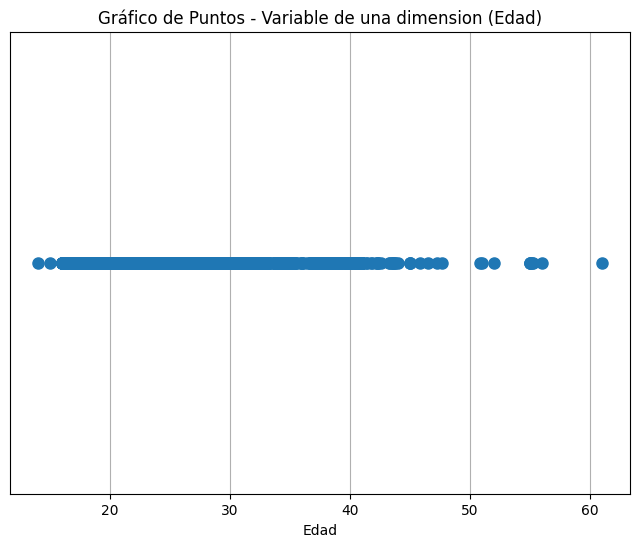

In [46]:
# Graficando los puntos en una dimensión
plt.figure(figsize=(8, 6))
plt.plot(df['Edad'], np.zeros_like(df['Edad']), 'o', markersize=8)  # Los puntos estarán en el eje x, y en 0
plt.yticks([])  # Quitamos los ticks del eje y para que se vea más limpio
plt.xlabel('Edad')
plt.title('Gráfico de Puntos - Variable de una dimension (Edad)')
plt.grid(True)  # Añadimos una cuadrícula para una mejor referencia visual
plt.show()


Como podemos observar en la visualización, nuestros datos tienden a alinearse a lo largo de una línea recta compuesta por puntos, donde cada punto representa una observación en nuestro conjunto de datos. Para comprender mejor las relaciones entre las variables, procederemos a crear un gráfico bidimensional. Este enfoque nos permite observar la representación geométrica de dos variables seleccionadas y analizar cómo se relacionan entre sí en el plano.

<function matplotlib.pyplot.show(close=None, block=None)>

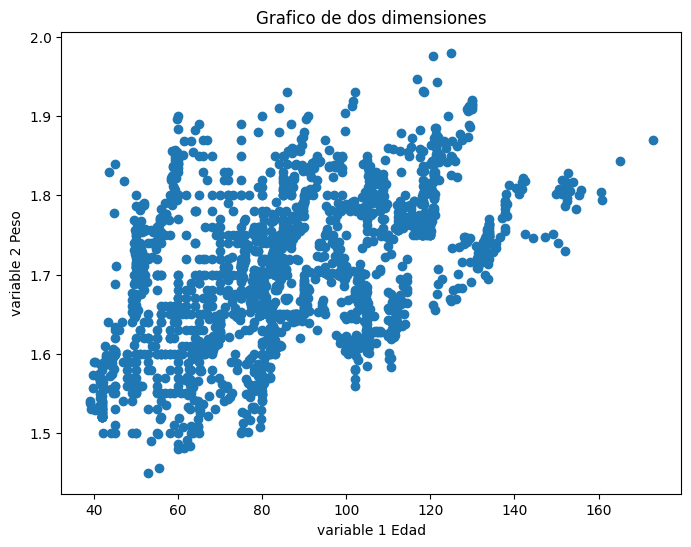

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(x='Peso', y= 'Altura',data= df)
plt.xlabel('variable 1 Edad')
plt.ylabel('variable 2 Peso')
plt.title('Grafico de dos dimensiones')
plt.show

Como hemos visto, nuestros datos pueden ser efectivamente visualizados no solo en dos dimensiones, sino también en tres. A continuación, presentamos un gráfico tridimensional que nos permite explorar más profundamente las interacciones y la distribución espacial entre tres variables seleccionadas de nuestro conjunto de datos. Esta visualización en tres dimensiones ofrece una perspectiva más completa y puede ayudar a identificar patrones o correlaciones que no son evidentes en visualizaciones más simples.

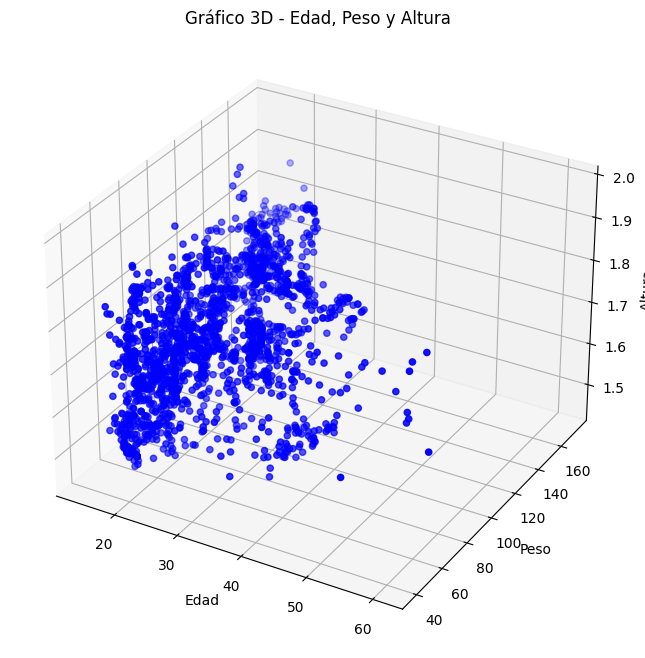

In [48]:
# Crear la figura y el espacio tridimensional
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en 3D
ax.scatter(df['Edad'], df['Peso'], df['Altura'], c='blue', marker='o')

# Etiquetas de los ejes
ax.set_xlabel('Edad')
ax.set_ylabel('Peso')
ax.set_zlabel('Altura')

# Título del gráfico
plt.title('Gráfico 3D - Edad, Peso y Altura')

plt.show()

Una vez presentado el concepto de dimensionalidad debemos comprender que el Análisis de Componentes Principales (PCA, por sus siglas en inglés). Busca reducir la cantidad de dimensiones (columnas) de nuestros datos mientras conserva la mayor cantidad posible de información. Al hacerlo, la manipulación y análisis de los datos se simplifican significativamente.

A continuación, nos sumergiremos en los detalles más técnicos y matemáticos de esta técnica. Espero que encuentren esta sección informativa y útil. No duden en dejar sus opiniones y comentarios. ¡Muchas gracias por su atención!

Supongamos que nos encontramos en una fiesta familiar y nos toca ser el fotógrafo. Imaginemos que nuestros familiares están dispersos en el espacio de la fiesta. Si tomamos una fotografía desde un ángulo inadecuado, es probable que no todos los familiares aparezcan en la imagen. Esto se puede ver en el siguiente gráfico:

<img src="Captura de pantalla 2024-04-23 172432.png" alt="Vista desde un ángulo donde no todos son visibles">

Ahora, si ajustamos nuestra posición y encontramos el ángulo correcto, podemos capturar una foto donde todos los integrantes de la familia están visibles:

<img src="Captura de pantalla 2024-04-23 172328.png" alt="Vista desde un ángulo donde todos son visibles">

Al realizar un análisis de componentes principales, estamos haciendo algo muy similar. Buscamos el "ángulo" óptimo desde el cual observar nuestros datos para que conserven la mayor cantidad de información posible. En términos estadísticos, este "ángulo" nos permite capturar la mayor varianza de los datos, entendiendo la varianza como la cantidad de información que cada componente posee sobre la distribución de los datos.


Antes de sumergirnos en el análisis de PCA, debemos entender estos conceptos fundamentales:

### Promedio (Media)
El promedio es el valor representativo de un conjunto de datos. Si imaginamos que el conjunto de datos es un conjunto de pesos en una balanza, el promedio sería el punto exacto sobre el cual la balanza estaría en equilibrio. En Python, podemos calcular la media usando `.mean()`. Un promedio más alto o más bajo nos da una idea del nivel general de la característica que estamos midiendo.

$$
\text{Promedio} = \frac{\sum_{i=1}^{n} x_i}{n}
$$

### Varianza
La varianza mide la heterogeneidad de un conjunto de datos. Una alta varianza indica que los valores están esparcidos sobre un amplio rango, como si estuvieran distribuidos ampliamente en un mapa. Por el contrario, una varianza baja indica que los valores están más concentrados cerca del promedio, agrupados en un área más pequeña del mapa. En Python, `.var()` calcula la varianza de un conjunto de datos.

$$
\text{Varianza} = \frac{\sum_{i=1}^{n} (x_i - \text{Promedio})^2}{n}
$$

### Covarianza
La covarianza indica la relación entre dos variables. Si la covarianza es positiva, generalmente significa que cuando una variable aumenta, la otra también lo hace; es como si dos bailarines se movieran juntos en la misma dirección en la pista de baile. Una covarianza negativa indica que se mueven en direcciones opuestas. Si la covarianza es cercana a cero, sugiere que no hay un patrón claro en sus movimientos conjuntos; cada uno se mueve sin una relación evidente con el otro. En Python, `.cov()` nos permite calcular la covarianza entre dos conjuntos de datos.

$$
\text{Covarianza} = \frac{\sum_{i=1}^{n} (x_i - \text{Promedio de } x) \cdot (y_i - \text{Promedio de } y)}{n}
$$


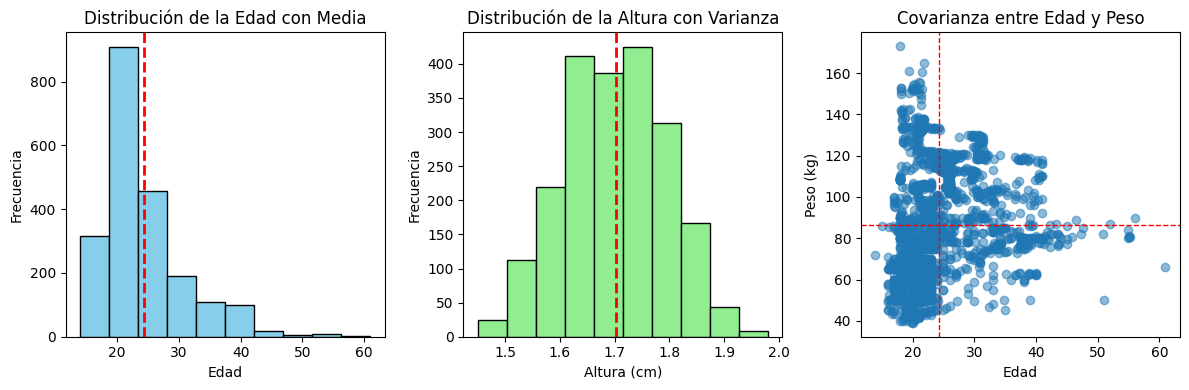

La media de la variable Edad es: 24.31
La varianza de la variable Altura es: 0.01
La covarianza entre las variables Edad y Peso es: 33.67


In [49]:

# Calculamos las medias
media_edad = df['Edad'].mean()
media_altura = df['Altura'].mean()
media_peso = df['Peso'].mean()

# Calculamos las varianzas
varianza_edad = df['Edad'].var()
varianza_altura = df['Altura'].var()
varianza_peso = df['Peso'].var()

# Calculamos la covarianza entre Edad y Peso
covarianza_edad_peso = df[['Edad', 'Peso']].cov().iloc[0, 1]

# Ejemplo de gráfico para la Media (Promedio)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(df['Edad'], bins=10, color='skyblue', edgecolor='black')
plt.axvline(media_edad, color='red', linestyle='dashed', linewidth=2)
plt.title('Distribución de la Edad con Media')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Ejemplo de gráfico para la Varianza
plt.subplot(1, 3, 2)
plt.hist(df['Altura'], bins=10, color='lightgreen', edgecolor='black')
plt.axvline(media_altura, color='red', linestyle='dashed', linewidth=2)
plt.title('Distribución de la Altura con Varianza')
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')

# Ejemplo de gráfico para la Covarianza
plt.subplot(1, 3, 3)
plt.scatter(df['Edad'], df['Peso'], alpha=0.5)
plt.axvline(media_edad, color='red', linestyle='dashed', linewidth=1)
plt.axhline(media_peso, color='red', linestyle='dashed', linewidth=1)
plt.title('Covarianza entre Edad y Peso')
plt.xlabel('Edad')
plt.ylabel('Peso (kg)')

plt.tight_layout()
plt.show()

# resultados
print(f"La media de la variable Edad es: {media_edad:.2f}")
print(f"La varianza de la variable Altura es: {varianza_altura:.2f}")
print(f"La covarianza entre las variables Edad y Peso es: {covarianza_edad_peso:.2f}")


## **COMENZAMOS**
Por ahora, dejaremos a un lado los datos de nuestro DataFrame original y generaremos un nuevo conjunto de datos ficticios. Estos datos nos servirán para ilustrar de manera clara y sencilla los principios fundamentales del Análisis de Componentes Principales (PCA). Una vez que hayamos comprendido bien estos conceptos con la ayuda de los datos ficticios, retomaremos el conjunto de datos real para aplicar un PCA práctico y examinar los resultados.


In [50]:
# Generar datos ficticios
np.random.seed(0)
peso = np.random.normal(60, 10, 100)  # Peso con media 60 kg y desviación estándar de 10 kg
altura = np.random.normal(170, 15, 100)  # Altura con media 170 cm y desviación estándar de 15 cm
datos = np.column_stack((peso, altura))

df_teorico = pd.DataFrame(datos, columns=['Peso', 'Altura'])
df_teorico

,Peso,Altura
0,77.640523,198.247260
1,64.001572,149.783614
2,69.787380,150.942725
3,82.408932,184.540951
4,78.675580,152.403149
...,...,...
95,67.065732,167.426805
96,60.105000,181.576858
97,77.858705,182.352562
98,61.269121,202.448539


Paso 1. Normalización
La normalización es el primer paso crucial en el análisis de componentes principales. Este proceso consiste en centrar los datos en el origen (0,0) del espacio de características, restando la media de cada variable a sus respectivos valores. Esta acción es fundamental porque permite que posteriormente se busquen direcciones (vectores propios) que maximicen la varianza a lo largo de los ejes.

Para entender la importancia de este paso, consideremos un ejemplo con dos variables: 'Número de puertas de un auto' y 'Valor del auto'. Sin normalización, la escala dispar entre estas dos variables podría resultar en que los datos se vean dominados por la variable con mayor magnitud, en este caso, el 'Valor del auto'. Esto puede sesgar nuestro análisis y llevarnos a conclusiones erróneas sobre la estructura de los datos.

Por eso, normalizar los datos asegura que cada variable contribuya equitativamente al análisis, permitiéndonos explorar qué proyección de los datos ofrece la mayor varianza y, por lo tanto, la mayor cantidad de información útil.

<img src="Captura de pantalla 2024-04-23 195549.png" alt="Ilustración de datos normalizados">

In [51]:
# Centrar los datos restando la media
media = df_teorico.mean()
df_centralizado = df_teorico - media
df_centralizado


,Peso,Altura
0,17.042443,27.017066
1,3.403492,-21.446580
2,9.189300,-20.287470
3,21.810852,13.310756
4,18.077500,-18.827046
...,...,...
95,6.467652,-3.803390
96,-0.493080,10.346664
97,17.260625,11.122368
98,0.671041,31.218345


Ahora que hemos normalizado nuestros datos, el siguiente paso es calcular la matriz de covarianza. ¿Por qué es necesaria la matriz de covarianza para realizar un análisis de componentes principales (PCA)?

La matriz de covarianza proporciona una medida cuantitativa de cómo cambian juntas las variables. Cada elemento de esta matriz representa la covarianza entre dos variables. Esto nos indica si dos variables tienden a aumentar y disminuir juntas (relación positiva) o si una aumenta mientras la otra disminuye (relación negativa). Estas relaciones son cruciales porque nos ayudan a identificar las direcciones de máxima varianza en el conjunto de datos.

Una vez tengamos la matriz de ella podes sacar a los vectores propios de la matriz estos representan las direcciones en el espacio de características donde los datos muestran mayor variabilidad. Estas direcciones son conocidas como los componentes principales. Los valores propios asociados a cada vector propio nos indican cuánta varianza hay en los datos a lo largo de esas direcciones. Ordenando los vectores propios de acuerdo a sus valores propios, de mayor a menor, identificamos las direcciones más significativas en términos de explicar la varianza en el conjunto de datos.

En resumen, con la matriz de covarianza obtenemos los vectores propios, que son direcciones en el espacio de características (en este caso, por ejemplo, Peso y Altura) donde los datos presentan mayor variabilidad. Cada vector propio apunta hacia una dirección del eje principal, originándose desde el origen (0,0), y el valor propio asociado indica cuánta varianza hay en los datos a lo largo de ese eje.

<img src="Captura de pantalla 2024-04-23 193941.png" alt="Visualización de la matriz de covarianza">

In [52]:
# Calcular la matriz de covarianza
matriz_covarianza = np.cov(df_centralizado, rowvar=False)
matriz_covarianza

array([[102.60874942,  17.65359424],
       [ 17.65359424, 243.30358991]])

### Paso 2: Matriz de Covarianza

#### Interpretación de la Matriz de Covarianza

La matriz de covarianza es una herramienta esencial para entender las relaciones entre las variables en un conjunto de datos. Aquí está la interpretación de sus componentes:

|                | Peso           | Altura         |
| -------------- | -------------- | -------------- |
| **Peso**       | 102.60874942   | 17.65359424    |
| **Altura**     | 17.65359424    | 243.30358991   |

- **Elementos diagonales**: Estos representan las varianzas de cada variable, es decir, cómo de dispersos están los valores respecto a su media.
  - `102.60874942`: Varianza de "Peso".
  - `243.30358991`: Varianza de "Altura".
- **Elementos no diagonales**: Estos elementos muestran las covarianzas entre las variables.
  - `17.65359424`: Covarianza entre Peso y Altura, indicando una relación positiva donde generalmente, cuando el Peso aumenta, la Altura también tiende a aumentar.

### Paso 3: Cálculo de Vectores y Valores Propios

#### Definición de Vector Propio

Un **vector propio** de una matriz cuadrada $A$ es un vector no nulo (diferente a 0) $\mathbf{v}$ que, al ser multiplicado por $A$, resulta en un vector que es un múltiplo escalar del original $\mathbf{v}$. La relación se describe matemáticamente como:

$$
A \mathbf{v} = \lambda \mathbf{v}
$$

donde $\lambda$ representa el valor propio asociado con el vector propio $\mathbf{v}$.

#### Interpretación Geométrica

Geométricamente, un vector propio de una matriz $A$ apunta en una dirección que es invariante bajo la transformación lineal representada por $A$. Al aplicar la transformación, la dirección del vector $\mathbf{v}$ se mantiene, aunque su magnitud puede escalar por $\lambda$.

#### Importancia de los Vectores Propios

Los vectores propios indican direcciones en el espacio de características donde los datos exhiben la máxima variabilidad, esenciales para la reducción de dimensionalidad y otras aplicaciones analíticas.

### Cálculo de Vectores Propios y Valores Propios

El cálculo de vectores propios y valores propios a partir de la matriz de covarianza nos ayuda a identificar las principales direcciones de variabilidad en los datos. En Python, esto se puede realizar fácilmente con la función `np.linalg.eig()`:


In [53]:
valores_propios, vectores_propios = np.linalg.eig(matriz_covarianza)
print("Valores propios:", valores_propios)
print("Vectores propios:\n", vectores_propios)

Valores propios: [100.42749309 245.48484623]
Vectores propios:
 [[-0.99245292 -0.12262626]
 [ 0.12262626 -0.99245292]]



### Interpretación de los Resultados de los Valores Propios y Vectores Propios

#### Valores Propios
Los valores propios obtenidos son `[100.42749309, 245.48484623]`. Aquí está su interpretación:

- **245.48484623**: Este es el valor propio más grande y representa la cantidad de varianza en los datos que es capturada por el componente principal correspondiente. Dado que es el mayor, indica que este componente principal es el más significativo en términos de explicar las diferencias en el conjunto de datos.
- **100.42749309**: Este valor propio, siendo menor, captura menos varianza en comparación con el primer componente. Aunque importante, tiene menos influencia en la estructura general de los datos.

#### Vectores Propios
Los vectores propios asociados a estos valores propios son:
```
[[-0.99245292 -0.12262626]
 [ 0.12262626 -0.99245292]]
```
La interpretación de cada columna, que representa un vector propio, es la siguiente:

- **Primer vector propio (`[-0.12262626, -0.99245292]`)**: Este vector, que corresponde al valor propio más grande (245.48484623), indica la dirección de máxima varianza en los datos. La alineación de ambos componentes en dirección negativa sugiere una correlación positiva entre las variables analizadas: a medida que una aumenta, la otra también tiende a hacerlo.
- **Segundo vector propio (`[-0.99245292, 0.12262626]`)**: Asociado al valor propio menor (100.42749309), este vector señala la segunda dirección más importante de variabilidad. Los signos opuestos de sus componentes indican una correlación negativa: una variable disminuye mientras la otra aumenta en esta dirección perpendicular al primer componente principal.

#### Implicaciones para PCA
En el contexto del Análisis de Componentes Principales (PCA):
- **Importancia de los componentes**: La considerable cantidad de varianza capturada por el primer componente principal sugiere que podríamos considerar reducir la dimensionalidad de los datos a un solo componente principal. Esto simplificaría el análisis manteniendo al mismo tiempo la mayor parte de la información relevante sobre las variaciones en el conjunto de datos.



## **VIZUALIZACION DE LOS VECTORES EN EL ESPACIO DE CARACTERITICAS**

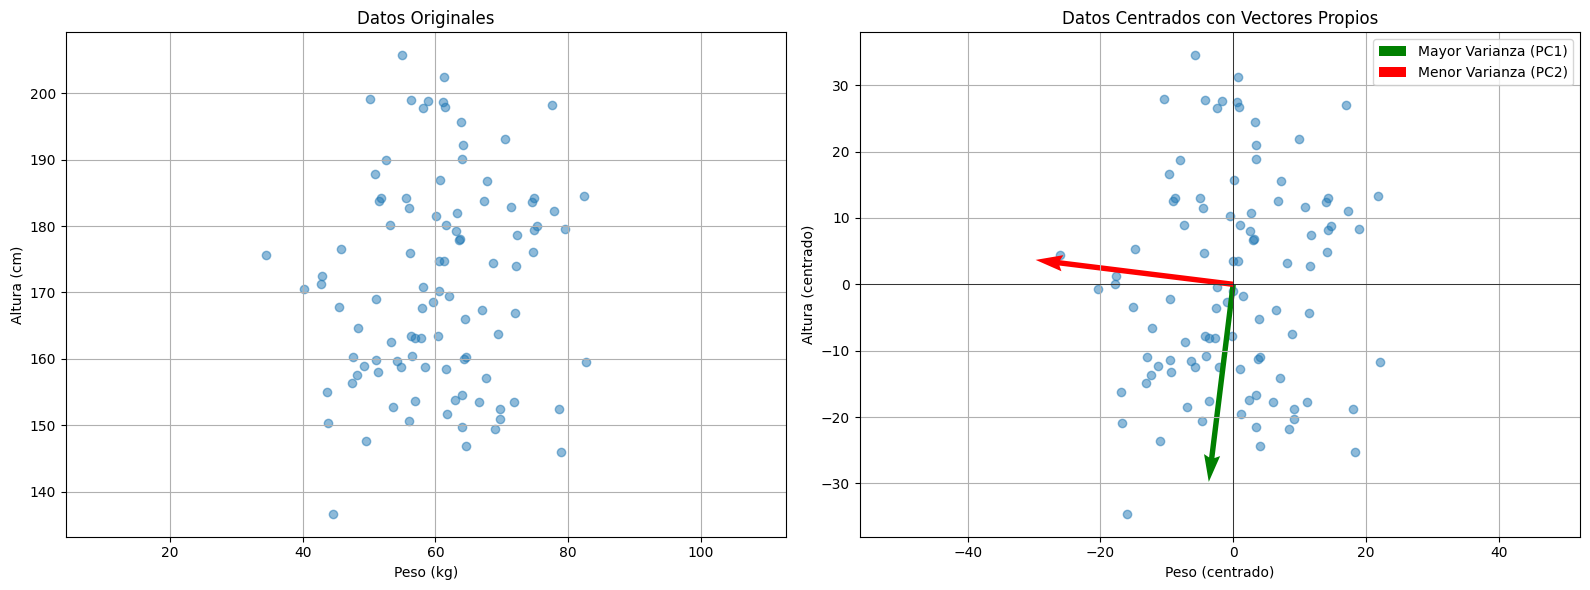

In [54]:
# Configurar la figura y los ejes para dos subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Dibujar los datos originales en el primer subplot
axs[0].scatter(df_teorico['Peso'], df_teorico['Altura'], alpha=0.5)
axs[0].set_title('Datos Originales')
axs[0].set_xlabel('Peso (kg)')
axs[0].set_ylabel('Altura (cm)')
axs[0].grid(True)
axs[0].axis('equal')  # Asegura que los ejes tengan la misma escala

# Dibujar los datos centrados en el segundo subplot
axs[1].scatter(df_centralizado['Peso'], df_centralizado['Altura'], alpha=0.5)

# Establecer el origen para los vectores propios
origin = [0, 0]  # Origen en (0,0)

# Escalar los vectores propios para una mejor visualización
scale = 30

# Dibujar los vectores propios como flechas
axs[1].quiver(*origin, vectores_propios[0, 1] * scale, vectores_propios[1, 1] * scale, color='g', scale=1, scale_units='xy', angles='xy', label='Mayor Varianza (PC1)')
axs[1].quiver(*origin, vectores_propios[0, 0] * scale, vectores_propios[1, 0] * scale, color='r', scale=1, scale_units='xy', angles='xy', label='Menor Varianza (PC2)')

# Configuraciones adicionales del gráfico para el segundo subplot
axs[1].set_title('Datos Centrados con Vectores Propios')
axs[1].set_xlabel('Peso (centrado)')
axs[1].set_ylabel('Altura (centrado)')
axs[1].grid(True)
axs[1].axis('equal')
axs[1].axhline(0, color='black', linewidth=0.5)  # Línea horizontal en el origen
axs[1].axvline(0, color='black', linewidth=0.5)  # Línea vertical en el origen

# Agregar leyenda para distinguir los vectores propios
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

Como podemos observar, el gráfico de la izquierda muestra la distribución original de los datos. Aquí, los puntos representan las posiciones iniciales de las variables 'Peso' y 'Altura'. En el gráfico de la derecha, los datos han sido normalizados y centrados en el origen, y se han añadido vectores extraidos de la matriz de covarianza que indican las direcciones principales de la variabilidad de los datos.

El vector de color verde, correspondiente al primer componente principal (PC1), señala la dirección de la mayor varianza. Esto implica que al proyectar los datos sobre este vector, capturamos la mayor parte de la información esencial del conjunto de datos. La proyección se realiza mediante el producto punto entre los datos centralizados y los vectores propios, resultando en la rotación de los ejes originales hacia las nuevas direcciones que maximizan la varianza observada.

Este proceso no solo simplifica la visualización de los datos sino que también facilita la detección de patrones y la reducción de la dimensionalidad para análisis posteriores. acontinuacion lo que haremos es realizar el producto punto de los datos y los vectores propios esto nos permite "girar" el espacio de dimensiones mantiendo los datos.

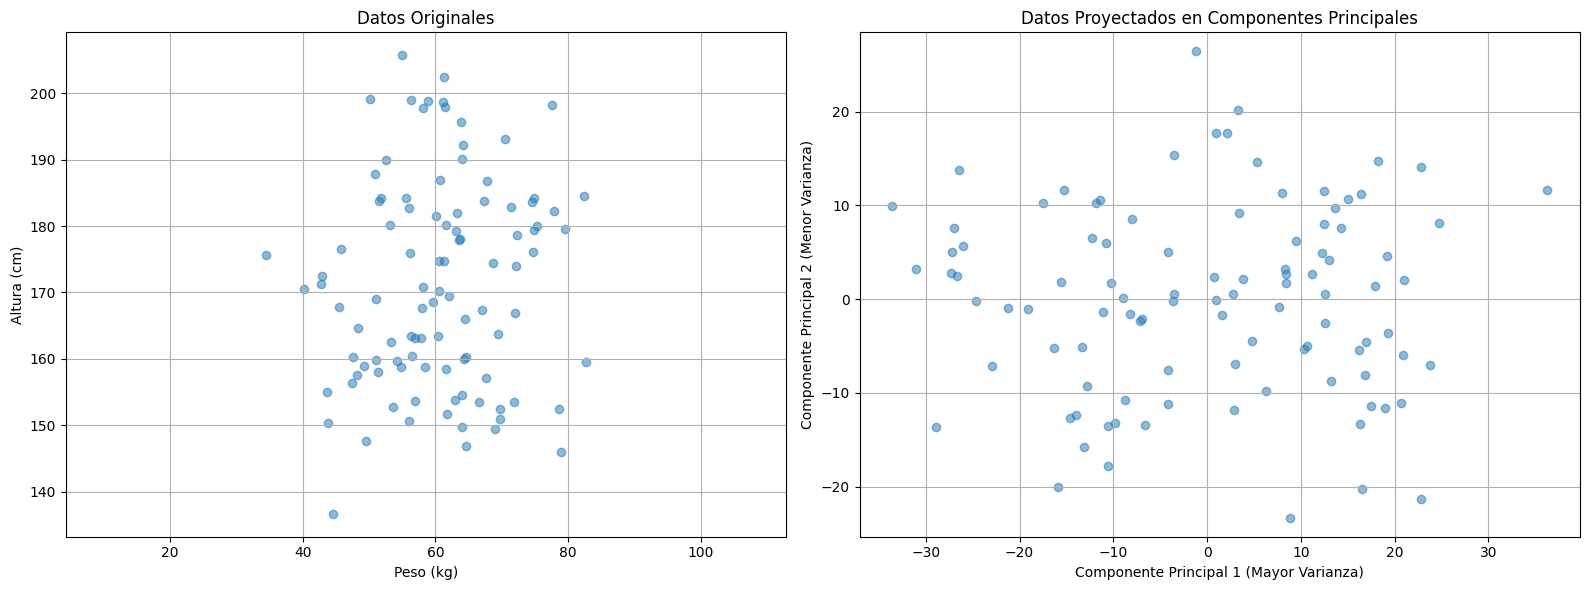

In [55]:

# Primero, configuramos una figura con dos subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# En el primer subplot, dibujamos los datos originales
axs[0].scatter(df_teorico['Peso'], df_teorico['Altura'], alpha=0.5)
axs[0].set_title('Datos Originales')
axs[0].set_xlabel('Peso (kg)')
axs[0].set_ylabel('Altura (cm)')
axs[0].grid(True)
axs[0].axis('equal')  # Asegura que los ejes sean iguales para comparar fácilmente

# Proyectar los datos centrados sobre los vectores propios
datos_proyectados = np.dot(df_centralizado, vectores_propios)

# En el segundo subplot, dibujamos los datos proyectados sobre los componentes principales
axs[1].scatter(datos_proyectados[:, 1], datos_proyectados[:, 0], alpha=0.5)
axs[1].set_title('Datos Proyectados en Componentes Principales')
axs[1].set_xlabel('Componente Principal 1 (Mayor Varianza)')
axs[1].set_ylabel('Componente Principal 2 (Menor Varianza)')
axs[1].grid(True)
axs[1].axis('equal')  # Mantiene la misma escala en ambos ejes

plt.tight_layout()
plt.show()


¡Hemos llegado casi al final! Haciendo referencia al ejemplo del fotógrafo en una fiesta familiar, podemos observar claramente la diferencia entre los puntos de nuestros datos originales y los datos ya rotados sobre los componentes principales. Esta transformación nos permite visualizar cuál componente conserva más información.

Desde la perspectiva del Análisis de Componentes Principales (PCA), los datos son ahora más fáciles de interpretar y analizar. PC1, el primer componente principal, es el que explica la mayor varianza de los datos, seguido por PC2, y así sucesivamente. Esto nos ayuda a decidir cuántos componentes mantener para representar nuestros datos de manera eficiente, permitiéndonos reducir la dimensionalidad sin perder información crítica.

## **NOS QUEDAMOS CON UNA COLUMNA Y COMPARAMOS NUESTROS DATOS ORIGINALES DE DOS DIMENSIONES CON LOS DATOS DE UNA DIMENSION**

In [56]:
# Seleccionar el vector correspondiente al componente principal con mayor varianza
vector_principal = vectores_propios[:, 1]  

# Proyectar los datos centrados sobre este vector principal
# Realizamos el producto punto para transformar los datos a la nueva base
proyeccion_principal = df_centralizado.dot(vector_principal)

# Crear un DataFrame para la nueva representación de datos
df_proyectada = pd.DataFrame(proyeccion_principal, columns=['Componente Principal 1'])

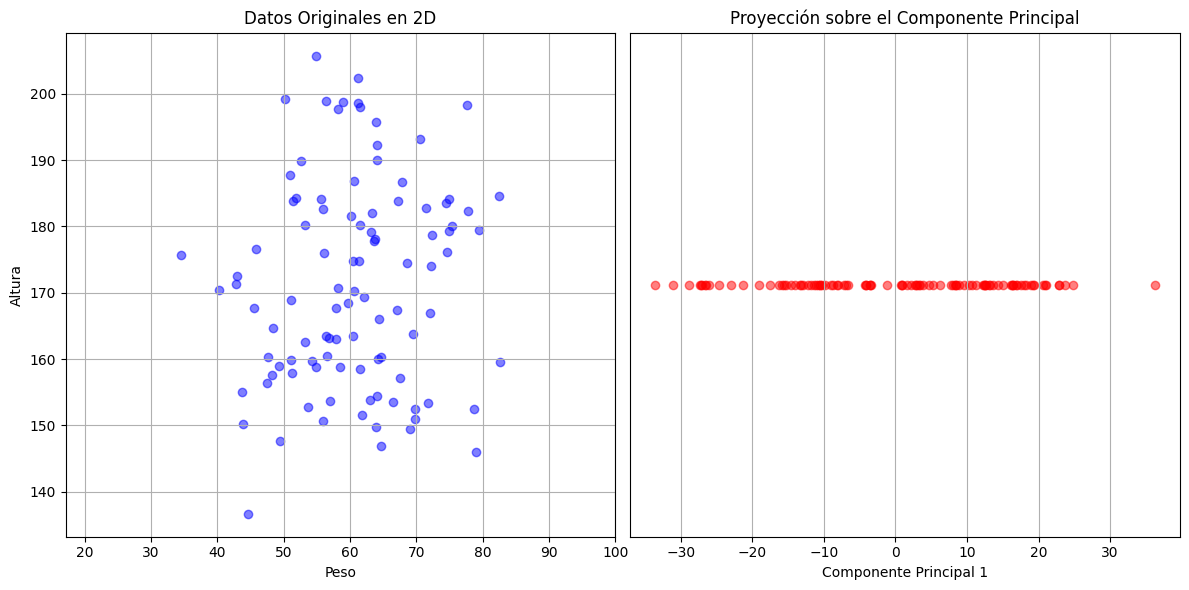

In [57]:

# Extraer las coordenadas originales
x_original = df_teorico['Peso']
y_original = df_teorico['Altura']

# Calcular los componentes proyectados para la visualización

componente_principal = np.dot(df_centralizado, vectores_propios[:, 1])

# Visualización
plt.figure(figsize=(12, 6))

# Graficar los datos originales
plt.subplot(1, 2, 1)
plt.scatter(x_original, y_original, alpha=0.5, color='blue')
plt.title('Datos Originales en 2D')
plt.xlabel('Peso')
plt.ylabel('Altura')
plt.grid(True)
plt.axis('equal')

# Graficar la proyección sobre el componente principal
plt.subplot(1, 2, 2)
plt.scatter(componente_principal, np.zeros_like(componente_principal), alpha=0.5, color='red')
plt.title('Proyección sobre el Componente Principal')
plt.xlabel('Componente Principal 1')
plt.yticks([])  # No mostrar marcas en el eje y
plt.grid(True)

plt.tight_layout()
plt.show()



### Resumen de lo que hicimos y repaso general:

En el código anterior, llevamos a cabo varios pasos cruciales dentro del proceso del Análisis de Componentes Principales (PCA):

1. **Normalización de los Datos**: Normalizamos nuestros datos para asegurar que estuvieran en la misma escala, facilitando la comparación y el análisis posterior.

2. **Selección del Vector Principal**: Seleccionamos el vector propio que corresponde al componente principal con mayor varianza. Este paso es crucial porque buscamos maximizar la información (varianza) que retenemos de los datos originales.

3. **Proyección de los Datos**: Proyectamos los datos centrados sobre este vector principal mediante el cálculo del producto punto entre el DataFrame de datos centrados y el vector principal. Este paso transforma los datos desde su espacio original a uno donde la principal variabilidad de los datos es capturada por un solo eje, simplificando enormemente los análisis subsecuentes.

4. **Creación de un Nuevo DataFrame**: Almacenamos los resultados de esta proyección en un nuevo DataFrame que contiene una única columna, representando los datos en términos del componente principal que captura la mayor varianza. Este proceso reduce la dimensionalidad de los datos mientras intenta conservar la mayor cantidad posible de información útil.

Como se mostró en la explicación sobre las dimensiones, PCA nos permite reducir la dimensionalidad de nuestros datos. Aunque nuestros datos "de juguete" son simples y solo tienen dos variables, la idea es entender el concepto de que PCA puede aplicarse a un conjunto de datos con muchas variables, por ejemplo, 300. PCA es una de muchas técnicas que deben estar en el arsenal de un analista o científico de datos. Utilizando esta técnica, podemos lograr una mayor eficiencia computacional al reducir nuestro dataset antes de ingresar a un modelo de Machine Learning. Además, podemos calcular los loadings para entender qué variables aportan más a los componentes, lo cual nos permite seleccionar las variables que más contribuyen.

Una vez explicado esto, nos pasaremos a los datos extraídos de la página de Kaggle para ilustrar cómo serían los pasos para realizar un análisis de PCA con un conjunto de datos más complejo.


In [58]:
df

,Género,Edad,Altura,Peso,historia_familiar_con_sobrepeso,consumo_frecuente_comida_calórica,frecuencia_consumo_vegetales,número_comidas_principal,consumo_alimentos_entre_comidas,fuma,consumo_agua,calorías_controladas,actividad_física_frecuencia,tiempo_uso_electrónicos,consumo_alcohol,tipo_transporte,tipo_obesidad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Género                             2111 non-null   object 
 1   Edad                               2111 non-null   float64
 2   Altura                             2111 non-null   float64
 3   Peso                               2111 non-null   float64
 4   historia_familiar_con_sobrepeso    2111 non-null   object 
 5   consumo_frecuente_comida_calórica  2111 non-null   object 
 6   frecuencia_consumo_vegetales       2111 non-null   float64
 7   número_comidas_principal           2111 non-null   float64
 8   consumo_alimentos_entre_comidas    2111 non-null   object 
 9   fuma                               2111 non-null   object 
 10  consumo_agua                       2111 non-null   float64
 11  calorías_controladas               2111 non-null   objec

### Pasos para Preparar los Datos para PCA

#### 1. Separación de Variables Categóricas y Numéricas
Es esencial comenzar separando las variables categóricas de las numéricas. Cada tipo de variable requiere un enfoque diferente para su procesamiento y análisis.

#### 2. Procesamiento de Datos Numéricos
Para las variables numéricas, el primer paso es escalar los valores. Esto es importante porque las variables pueden tener diferentes escalas y unidades, lo que puede afectar el análisis de PCA. La normalización asegura que todas las variables contribuyan de manera equitativa al análisis.

#### 3. Codificación de Variables Categóricas
Para las variables categóricas, es necesario codificarlas en valores numéricos. Esto se hace utilizando técnicas como One-Hot Encoding, que convierte las variables categóricas en un conjunto de variables binarias, o Label Encoding, que asigna un valor numérico único a cada categoría.

#### 4. Creación del DataFrame Preparado
Finalmente, combinamos las variables numéricas escaladas y las variables categóricas codificadas en un nuevo DataFrame llamado df_prepared. Este DataFrame contendrá los datos listos para el análisis de componentes principales.


In [60]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identificar las columnas numéricas y categóricas
num_cols = ['Edad', 'Altura', 'Peso', 'actividad_física_frecuencia', 'tiempo_uso_electrónicos', 'consumo_agua', 'frecuencia_consumo_vegetales', 'número_comidas_principal']
cat_cols = ['Género', 'historia_familiar_con_sobrepeso', 'consumo_frecuente_comida_calórica',
            'consumo_alimentos_entre_comidas', 'fuma', 'calorías_controladas', 'consumo_alcohol', 'tipo_transporte','tipo_obesidad']

# Preprocesador para aplicar transformaciones a columnas numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),  # Escalado estándar para datos numéricos
        ('cat', OneHotEncoder(), cat_cols)    # Codificación one-hot para datos categóricos
    ])

# Aplicar el preprocesador a los datos
df_transformed = preprocessor.fit_transform(df)

# Obtener los nombres de las nuevas columnas one-hot de la transformación
# 'get_feature_names_out' sin parámetros ya que el ColumnTransformer maneja directamente esta llamada
column_names = num_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out())

# Crear un DataFrame con las nuevas columnas
df_prepared = pd.DataFrame(df_transformed, columns=column_names)

df_prepared



,Edad,Altura,Peso,actividad_física_frecuencia,tiempo_uso_electrónicos,consumo_agua,frecuencia_consumo_vegetales,número_comidas_principal,Género_Female,Género_Male,...,tipo_transporte_Motorbike,tipo_transporte_Public_Transportation,tipo_transporte_Walking,tipo_obesidad_Insufficient_Weight,tipo_obesidad_Normal_Weight,tipo_obesidad_Obesity_Type_I,tipo_obesidad_Obesity_Type_II,tipo_obesidad_Obesity_Type_III,tipo_obesidad_Overweight_Level_I,tipo_obesidad_Overweight_Level_II
0,-0.522124,-0.875589,-0.862558,-1.188039,0.561997,-0.013073,-0.785019,0.404153,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.522124,-1.947599,-1.168077,2.339750,-1.080625,1.618759,1.088342,0.404153,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.206889,1.054029,-0.366090,1.163820,0.561997,-0.013073,-0.785019,0.404153,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.423582,1.054029,0.015808,1.163820,-1.080625,-0.013073,1.088342,0.404153,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.364507,0.839627,0.122740,-1.188039,-1.080625,-0.013073,-0.785019,-2.167023,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-0.525774,0.097045,1.711763,0.783135,0.407996,-0.456705,1.088342,0.404153,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2107,-0.367195,0.502844,1.800914,0.389341,-0.096251,-0.004702,1.088342,0.404153,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2108,-0.281909,0.541672,1.798868,0.474971,-0.019018,0.075361,1.088342,0.404153,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2109,0.007776,0.404927,1.785780,0.151471,-0.117991,1.377801,1.088342,0.404153,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


1. Varianza Explicada
Una métrica clave en PCA es la "varianza explicada", que indica cuánta varianza de los datos originales es capturada por cada componente principal. Normalmente, se busca conservar suficientes componentes para capturar una gran proporción de la varianza total.

In [61]:
from sklearn.decomposition import PCA

# Aplicar PCA sin reducir la dimensionalidad
pca = PCA()
pca.fit(df_prepared)

# Calcular la varianza explicada acumulativa
varianza_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Encontrar el número de componentes para explicar el umbral deseado de varianza, e.g., 90%
num_componentes = np.where(varianza_explicada_acumulada >= 0.90)[0][0] + 1
print(f"Número de componentes necesarios para explicar al menos el 90% de la varianza: {num_componentes}")

Número de componentes necesarios para explicar al menos el 90% de la varianza: 13


2. Gráfico de Codo (Scree Plot)
El gráfico de codo es una herramienta visual para evaluar cuántos componentes principales se deben retener. La idea es buscar un punto donde el incremento en la varianza explicada se 'aplane' o donde se observe un 'codo'.

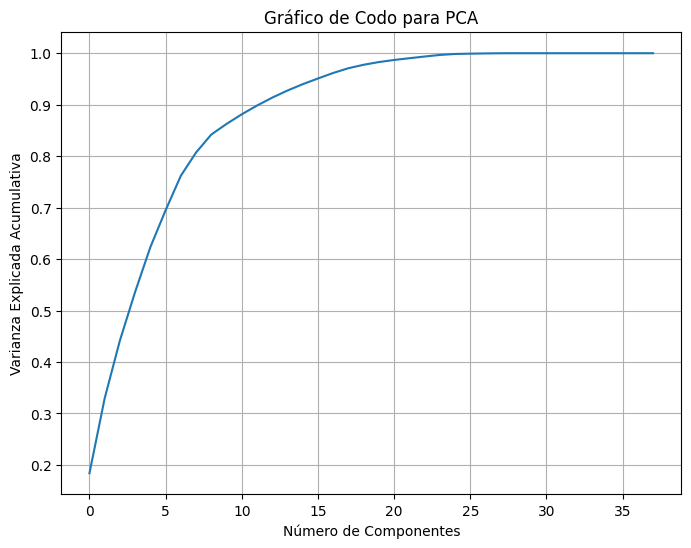

In [62]:
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Gráfico de Codo para PCA')
plt.grid(True)
plt.show()

Como podemos ver el en eje de las Y tenemos la cantiadad de varianza explicada acumulada y en el eje de las X tenemos el nuemero de componentes la idea es econtrar el punto donde la curva de hace constante de esta forma podemos ver la cantidad de componentes principales 21 aprox en los que ya la varianza no aumenta. este es uno de los tantos metodos que podemos utilizar. otro de los metodos es unas el criterio de Kaiser Este criterio sugiere conservar solo aquellos componentes principales cuyos valores propios sean mayores que el promedio de los valores propios. Es decir, se mantienen los componentes con valores propios superiores a 1 en el caso de datos estandarizados.

In [63]:
valores_propios = pca.explained_variance_
componentes_kaiser = valores_propios[valores_propios > 1].size
print(f"Número de componentes según el criterio de Kaiser: {componentes_kaiser}")

Número de componentes según el criterio de Kaiser: 4


A modo de ejemploficacion usaremos el criterio de Kaiser para poder determinar la cantidad de componentes principales. este metodo nos suguiere solo 4 componentes proncipales. el metodo para poder elegir la cantidad de componenetes requieren de un analisis exausitvo por parte de analisita y una comprension profunda de la problematica. en este note solo estamos ejemplificando los pasos en un analisis de PCA con un set de datos. Una vez tenemos nuestros componentes podemos observar un grafico de varianza explicada acumulada 

Varianza explicada acumulada con 4 componentes: [0.18386363 0.32960815 0.44192084 0.53635357]


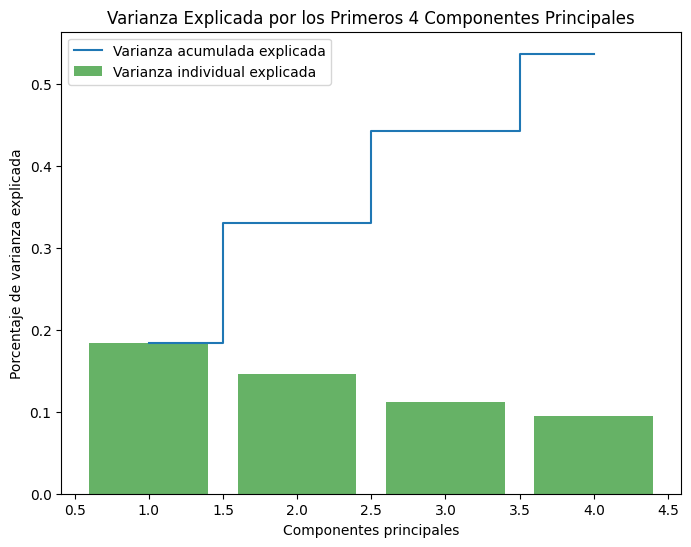

In [64]:

# Configurar PCA con 4 componentes
pca = PCA(n_components=4)
df_pca = pca.fit_transform(df_prepared)  # Transformar los datos originales

# Varianza explicada acumulada con 4 componentes
varianza_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)
print("Varianza explicada acumulada con 4 componentes:", varianza_explicada_acumulada)

# Visualizar la varianza explicada acumulada
plt.figure(figsize=(8, 6))
plt.bar(range(1, 5), pca.explained_variance_ratio_, alpha=0.6, color='g', label='Varianza individual explicada')
plt.step(range(1, 5), varianza_explicada_acumulada, where='mid', label='Varianza acumulada explicada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.title('Varianza Explicada por los Primeros 4 Componentes Principales')
plt.legend(loc='best')
plt.show()


### Interpretación de los Componentes Principales

**Varianza Explicada por Cada Componente:**
Este gráfico muestra la contribución de cada uno de los primeros cuatro componentes a la varianza total de los datos. Es esencial para comprender la importancia de cada componente dentro del conjunto de datos.

**Varianza Explicada Acumulada:**
Este indicador te permitirá visualizar la suma total de la varianza capturada con la incorporación progresiva de cada componente. Utilizando estos cuatro componentes, es posible realizar análisis más detallados, como clustering, simplificación de modelos predictivos, o crear visualizaciones más claras. Aprovechando la reducción de dimensionalidad, puedes manejar grandes volúmenes de datos mientras retienes la mayor parte de la información significativa. En este caso, nuestros cuatro componentes explican aproximadamente el 55% de la varianza del conjunto de datos. Este análisis no solo se debe limitar a esto; una de las muchas ventajas del análisis de componentes principales es la capacidad de identificar qué variables contribuyen más a cada componente principal. Esto se hace a través de los loadings, extrayendo las variables que contienen la mayor cantidad de información.

### ¿Qué son los Loadings en PCA?

Los loadings en el análisis de componentes principales son cruciales para interpretar la relación entre las variables originales y los componentes derivados. Un loading es un coeficiente que multiplica cada variable original en la combinación lineal que forma un componente principal. Estos coeficientes indican tanto la dirección de los vectores en el espacio transformado como la importancia de cada variable en ese vector.

### Cálculo de los Loadings

**Fórmula para los Loadings:**
$$ \text{Loading} = \text{Vector propio} \times \sqrt{\text{Valor propio}} $$


Donde:
- **Vector propio** se refiere a una columna de la matriz `pca.components_` en tu código.
- **Valor propio** es un elemento de `pca.explained_variance_`.

Estos vectores propios, calculados a partir de la matriz de covarianza o de correlación de los datos, representan las direcciones de máxima variabilidad. Los valores propios asociados nos informan sobre cuánta varianza hay en cada dirección. Al calcular los loadings, ajustamos la escala de estos vectores propios según su importancia.

### Interpretación de los Loadings

**Por Qué:**
Los loadings se utilizan para entender cómo cada componente principal es una combinación lineal de las variables originales. Multiplicando los vectores propios por la raíz cuadrada de los valores propios, ponderamos la dirección de los vectores por su "importancia". Esto permite evaluar qué tan significativa es cada variable original para cada componente principal.

**Cómo:**
Un valor alto (positivo o negativo) en el loading de una variable indica que esta variable tiene un fuerte impacto en ese componente principal. Esto sugiere que la variable contribuye significativamente a la variabilidad que el componente principal busca capturar.

Para visualizar la relevancia de cada variable, primero debemos analizar cuánto aportan las variables a los componentes principales. Con esta información, podemos elaborar un mapa de calor que muestre la importancia de las variables en los componentes. Posteriormente, realizaremos una extracción de la importancia de las variables, seguida de la creación de un gráfico y su interpretación detallada.

In [65]:
# Vectores propios (componentes de PCA)
vectores_propios = pca.components_

# Valores propios (varianza explicada por cada componente)
valores_propios = pca.explained_variance_

# Calcular los loadings multiplicando cada vector propio por la raíz cuadrada del valor propio correspondiente
loadings = vectores_propios.T * np.sqrt(valores_propios)

# Crear un DataFrame para los loadings
column_names = preprocessor.get_feature_names_out()
loading_matrix = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(vectores_propios.shape[0])], index=column_names)

# Mostrar la matriz de loadings
print(loading_matrix)


                                                      PC1       PC2       PC3  \
num__Edad                                       -0.173715  0.727528  0.411264   
num__Altura                                     -0.819912 -0.263945  0.220499   
num__Peso                                       -0.778721  0.344490 -0.205560   
num__actividad_física_frecuencia                -0.289088 -0.540261  0.092411   
num__tiempo_uso_electrónicos                     0.053170 -0.568513 -0.119486   
num__consumo_agua                               -0.446180 -0.162219 -0.212930   
num__frecuencia_consumo_vegetales               -0.145413  0.270825 -0.774123   
num__número_comidas_principal                   -0.366173 -0.221834 -0.109645   
cat__Género_Female                               0.247521  0.117226 -0.267643   
cat__Género_Male                                -0.247521 -0.117226  0.267643   
cat__historia_familiar_con_sobrepeso_no          0.178279 -0.086827  0.000636   
cat__historia_familiar_con_s

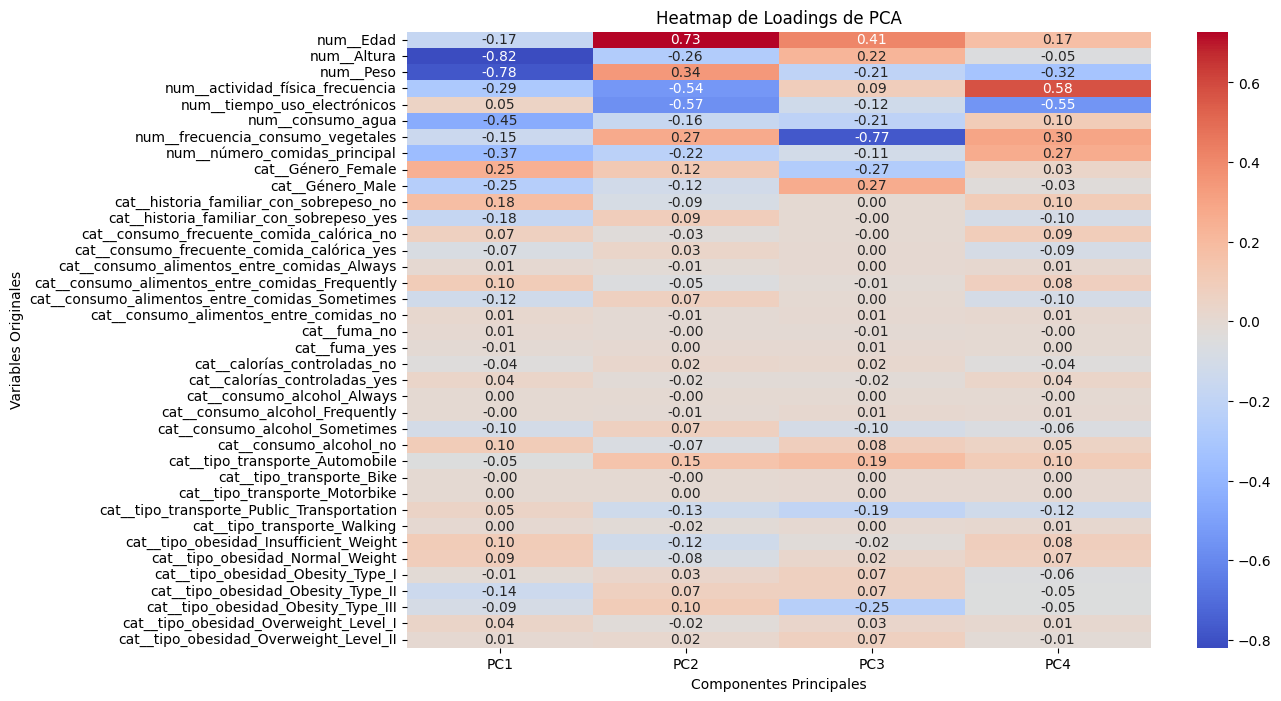

In [66]:
plt.figure(figsize=(12, 8))
sns.heatmap(loading_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap de Loadings de PCA')
plt.xlabel('Componentes Principales')
plt.ylabel('Variables Originales')
plt.show()


### Interpretación de los Loadings

**Loadings Altos (positivos o negativos):** 
Estos indican una contribución significativa de una variable a ese componente principal. Un loading alto, ya sea positivo o negativo, sugiere que un cambio en dicha variable tendrá un gran impacto en la característica que el componente está capturando.

**Loadings Bajos:**
Por otro lado, loadings bajos señalan que la variable tiene poca influencia en el componente. Un loading cercano a cero implica que la variable no afecta de manera considerable la dirección o la magnitud del componente principal.

Espero que este notebook haya sido de utilidad. Recuerda que siempre puedes expresar tus dudas y recomendaciones para mejorar. Si has llegado hasta aquí, solo me queda agradecerte sinceramente por dedicar tu tiempo a este material.

Cordialmente,

Juan Cruz Sosa